In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

In [2]:
# Reading The data

covid_confirmed = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_deaths = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid_recovered = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
print(covid_confirmed.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [13]:
# Renaming to consistent values

covid_confirmed['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_deaths['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_recovered['Country/Region'].replace('Mainland China', 'China', inplace=True)

In [4]:
# Handling empty data

covid_confirmed[['Province/State']] = covid_confirmed[['Province/State']].fillna('')
covid_confirmed.fillna(0, inplace=True)
covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('')
covid_deaths.fillna(0, inplace=True)
covid_recovered[['Province/State']] = covid_recovered[['Province/State']].fillna('')
covid_recovered.fillna(0, inplace=True)

In [5]:
# Snapshot as of today.
# Start by aggregating all the cases to see a snapshot for the world.
covid_confirmed_count = covid_confirmed.iloc[:, 4:].sum().max()
covid_deaths_count = covid_deaths.iloc[:, 4:].sum().max()
covid_recovered_count = covid_recovered.iloc[:, 4:].sum().max()

print('Total confirmed, dead, and recovered numbers in the world, respectively: ',
      covid_confirmed_count, covid_deaths_count, covid_recovered_count)

Total confirmed, dead, and recovered numbers in the world, respectively:  676570149 6881802 130899061


In [7]:
# storing all these numbers in a dataframe for an easy plotting.
# Also calculating active cases by doing: Active=Confirmed−Deaths−Recovered.

world_df = pd.DataFrame({
    'confirmed': [covid_confirmed_count],
    'deaths': [covid_deaths_count],
    'recovered': [covid_recovered_count],
    'active': [covid_confirmed_count - covid_deaths_count - covid_recovered_count]
})
print(world_df)

   confirmed   deaths  recovered     active
0  676570149  6881802  130899061  538789286


In [8]:
# Unpivot the DataFrame from wide to long format
world_long_df = world_df.melt(value_vars=['active', 'deaths', 'recovered'],
                              var_name="status",
                              value_name="count")
world_long_df['upper'] = 'confirmed'
print(world_long_df)

      status      count      upper
0     active  538789286  confirmed
1     deaths    6881802  confirmed
2  recovered  130899061  confirmed


### Treemap plotting


In [10]:
fig = px.treemap(world_long_df, path=['status'], values='count', template='plotly_dark')
plot(fig)

'temp-plot.html'

## Evolution of virus cases over time

In [12]:
# Removing first 4 columns about state, country, etc. and sum numbers for all dates

covid_worldwide_confirmed = covid_confirmed.iloc[:, 4:].sum(axis=0)
covid_worldwide_deaths = covid_deaths.iloc[:, 4:].sum(axis=0)
covid_worldwide_recovered = covid_recovered.iloc[:, 4:].sum(axis=0)
covid_worldwide_active = covid_worldwide_confirmed - covid_worldwide_deaths - covid_worldwide_recovered

### Using Seaborn for plotting

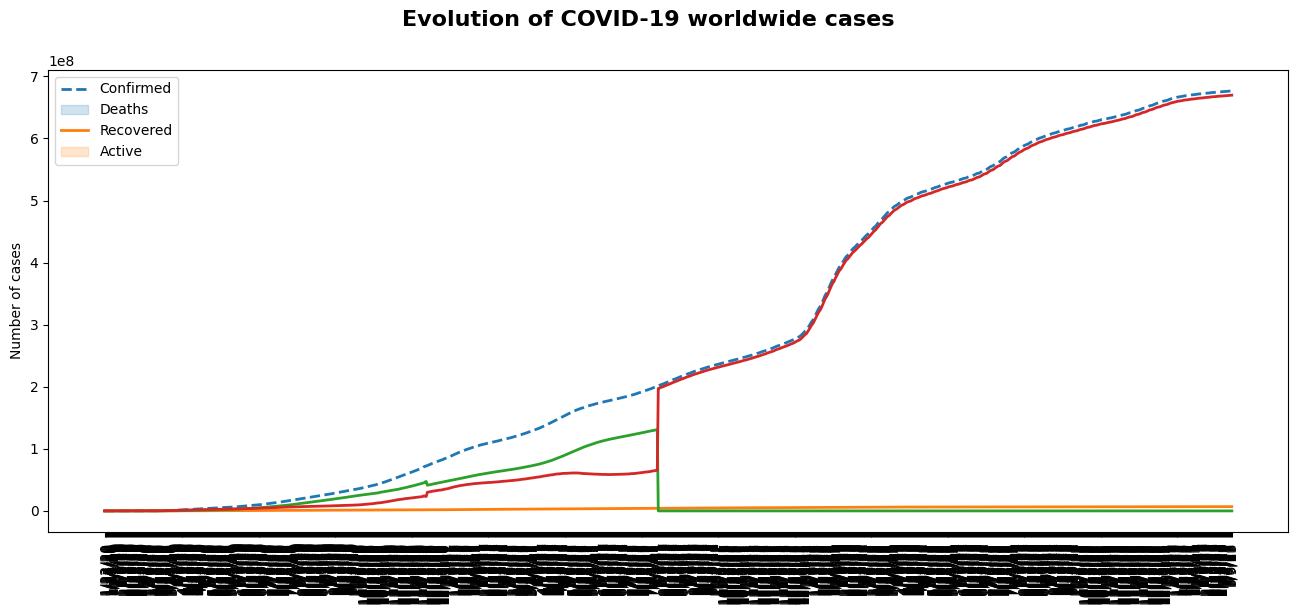

In [14]:

fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_worldwide_confirmed.index, y=covid_worldwide_confirmed, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_deaths.index, y=covid_worldwide_deaths, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_recovered.index, y=covid_worldwide_recovered, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_active.index, y=covid_worldwide_active, sort=False, linewidth=2)

ax.lines[0].set_linestyle("--")  # Plot Confirmed cases in dashed lines

plt.suptitle("Evolution of COVID-19 worldwide cases", fontsize=16, fontweight='bold', color='black')

plt.xticks(rotation=90)
plt.ylabel('Number of cases')

ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

plt.show()

## Evolution of Mortality rate

In [15]:
# Creating a new data frame to capture all the numbers for confirmed, recovered, active, death.
world_rate_df = pd.DataFrame({
    'confirmed': covid_worldwide_confirmed,
    'deaths': covid_worldwide_deaths,
    'recovered': covid_worldwide_recovered,
    'active': covid_worldwide_active
}, index=covid_worldwide_confirmed.index)

print(world_rate_df.tail())

        confirmed   deaths  recovered     active
3/5/23  676024901  6877749          0  669147152
3/6/23  676082941  6878115          0  669204826
3/7/23  676213378  6879038          0  669334340
3/8/23  676392824  6880483          0  669512341
3/9/23  676570149  6881802          0  669688347


In [16]:
# Calculating recovery and mortality rate as a fraction of confirmed
world_rate_df['recovery rate'] = world_rate_df['recovered'] / world_rate_df['confirmed'] * 100
world_rate_df['mortality rate'] = world_rate_df['deaths'] / world_rate_df['confirmed'] * 100
world_rate_df['date'] = world_rate_df.index

print(world_rate_df.tail())

        confirmed   deaths  recovered     active  recovery rate  \
3/5/23  676024901  6877749          0  669147152            0.0   
3/6/23  676082941  6878115          0  669204826            0.0   
3/7/23  676213378  6879038          0  669334340            0.0   
3/8/23  676392824  6880483          0  669512341            0.0   
3/9/23  676570149  6881802          0  669688347            0.0   

        mortality rate    date  
3/5/23        1.017381  3/5/23  
3/6/23        1.017348  3/6/23  
3/7/23        1.017288  3/7/23  
3/8/23        1.017232  3/8/23  
3/9/23        1.017160  3/9/23  


In [18]:
# Unpivot the DataFrame from wide to long format
world_rate_long_df = world_rate_df.melt(id_vars="date",
                                        value_vars=['recovery rate', 'mortality rate'],
                                        var_name="status",
                                        value_name="ratio")
print(world_rate_long_df)

         date          status     ratio
0     1/22/20   recovery rate  5.385996
1     1/23/20   recovery rate  4.870624
2     1/24/20   recovery rate  4.131356
3     1/25/20   recovery rate  2.922756
4     1/26/20   recovery rate  2.641509
...       ...             ...       ...
2281   3/5/23  mortality rate  1.017381
2282   3/6/23  mortality rate  1.017348
2283   3/7/23  mortality rate  1.017288
2284   3/8/23  mortality rate  1.017232
2285   3/9/23  mortality rate  1.017160

[2286 rows x 3 columns]


### Using plotly to plot the numbers

In [21]:
fig = px.line(world_rate_long_df, x="date", y="ratio", color='status', log_y=True,
              title='Recovery and Mortality rate over the time',
              color_discrete_sequence=['#2ecc71', '#e74c3c'],
              template='plotly_dark')

plot(fig)

'temp-plot.html'

## Plotting data onto a map using latitude and longitude values
Takes a bit of time based on the number of countries.


In [23]:
# Grouping rows that contain same Country/Region values.
# We will use sum to add all values while grouping.

covid_confirmed_agg = covid_confirmed.groupby('Country/Region').sum().reset_index()

C:\Users\Ayub\AppData\Local\Temp\ipykernel_25168\2060997321.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [24]:
# Data for some countries is broken down into states/provinces.
#Therefore the calculation of mean latitude and longitude is needed
covid_confirmed_agg.loc[:, ['Lat', 'Long']] = covid_confirmed.groupby('Country/Region').mean().reset_index().loc[:,
                                              ['Lat', 'Long']]

C:\Users\Ayub\AppData\Local\Temp\ipykernel_25168\1311862287.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [25]:
# Since there are a lot of countries, for easy visualization let us only look at countries with high numbers
MIN_CASES = 100000
covid_confirmed_agg = covid_confirmed_agg[covid_confirmed_agg.iloc[:, 3:].max(axis=1) > MIN_CASES]
print(covid_confirmed_agg.shape)
print(covid_confirmed_agg.head())

(127, 1146)
  Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.93911  67.709953        0        0        0        0   
1        Albania  41.15330  20.168300        0        0        0        0   
2        Algeria  28.03390   1.659600        0        0        0        0   
4         Angola -11.20270  17.873900        0        0        0        0   
7      Argentina -38.41610 -63.616700        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...   2/28/23    3/1/23    3/2/23    3/3/23  \
0        0        0        0  ...    209322    209340    209358    209362   
1        0        0        0  ...    334391    334408    334408    334427   
2        0        0        0  ...    271441    271448    271463    271469   
4        0        0        0  ...    105255    105277    105277    105277   
7        0        0        0  ...  10044125  10044125  10044125  10044125   

     3/4/23    3/5/23    3/6/23    3/7/23    3/8/23    3/9/23 

In [26]:
# Unpivot the DataFrame from wide to long format
covid_confirmed_agg_long = pd.melt(covid_confirmed_agg,
                                   id_vars=covid_confirmed_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=covid_confirmed_agg.iloc[:, 3:],
                                   value_name='date_confirmed_cases')

### Plotly for visualization

In [27]:
fig = px.scatter_geo(covid_confirmed_agg_long, lat="Lat", lon='Long',
                     color='Country/Region', hover_name='Country/Region', size='date_confirmed_cases',
                     size_max=50, animation_frame='date', template='plotly_dark', projection='natural earth',
                     title='COVID-19 worldwide confirmed cases over time')

plot(fig)

'temp-plot.html'

## The top 10 countries with the highest COVID cases and deaths

In [28]:
# Start by converting all data into the long format
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                            id_vars=covid_deaths.iloc[:, :4],
                            var_name='date',
                            value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')

In [29]:
# Merge all three dataframes into one for easy plotting
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']

In [30]:
# Add a new column for active cases
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']

In [31]:
# Aggregate data by Country/Region and then Province/State
# Find out maximum values as a function of time
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

In [32]:
# Group the data by Country/Region, get sum of cases every state in the country.
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

C:\Users\Ayub\AppData\Local\Temp\ipykernel_25168\1194080835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [33]:
# Remove Lat and Long columns as we would not be using them
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

### Plotting Top 10 countries with confirmed cases with plotly

In [34]:
top_10_confirmed = covid_countries_df.sort_values(by='confirmed', ascending=False).head(10)

fig = px.bar(top_10_confirmed.sort_values(by='confirmed', ascending=True),
             x="confirmed", y="Country/Region",
             title='Confirmed Cases', text='confirmed',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#3498db', textposition='outside')

plot(fig)

'temp-plot.html'

### Plotting Top 10 countries with high recovery numbers

In [35]:
top_10_recovered = covid_countries_df.sort_values(by='recovered', ascending=False).head(10)
fig = px.bar(top_10_recovered.sort_values(by='recovered', ascending=True),
             x="recovered", y="Country/Region",
             title='Recovered Cases', text='recovered',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

plot(fig)

'temp-plot.html'

### Plotting Top 10 countries with the highest number of deaths

In [36]:
top_10_deaths = covid_countries_df.sort_values(by='deaths', ascending=False).head(10)
fig = px.bar(top_10_confirmed.sort_values(by='deaths', ascending=True),
             x="deaths", y="Country/Region",
             title='Death Cases', text='deaths',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#e74c3c', textposition='outside')
plot(fig)

'temp-plot.html'

### Plotting Top 10 countries with the highest mortality rate

In [37]:
covid_countries_df['mortality_rate'] = round(covid_countries_df['deaths'] / covid_countries_df['confirmed'] * 100, 2)
temp = covid_countries_df[covid_countries_df['confirmed'] > 1000000]
top_10_mortality_rate = temp.sort_values(by='mortality_rate', ascending=False).head(10)

fig = px.bar(top_10_mortality_rate.sort_values(by='mortality_rate', ascending=True),
             x="mortality_rate", y="Country/Region",
             title='Mortality rate', text='mortality_rate',
             template='plotly_dark', orientation='h',
             width=700, height=600)

fig.update_traces(marker_color='#c0392b', textposition='outside')

plot(fig)


'temp-plot.html'